In [1]:
import numpy as np, plottools as pl, healpy as hp, binning as bn, analysis as ana, tools_qrec, curvedsky as cs, pickle, local, tools_cmb, tools_cib, warnings
from matplotlib.pyplot import *
from scipy.signal import savgol_filter
warnings.filterwarnings("ignore")

In [3]:
aobj = local.init_analysis(freq='143',dtype='full',wind='LG60')

In [4]:
qobj = tools_qrec.init_quad(aobj.snmax,ids=local.ids,rlz=aobj.rlz,stag=aobj.stag,qtypes=['ilens'],rlmin=100,rlmax=2048)

In [5]:
iobj = tools_cib.init_cib(wind='G60')

In [6]:
xobj = tools_qrec.cross(qobj['ilens'],iobj)

In [7]:
L, ilTB = np.loadtxt(xobj.fcli['TB'][0],unpack=True,usecols=(0,1))
L, ilEB = np.loadtxt(xobj.fcli['EB'][0],unpack=True,usecols=(0,1))

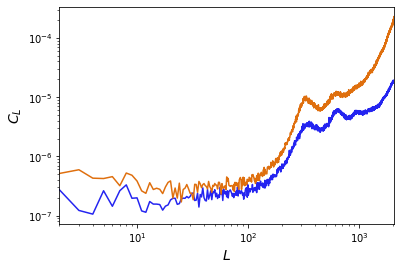

In [8]:
pl.plot_1dstyle(xmin=2,xmax=aobj.lmax,xlog=True,ylog=True)
plot(L,ilTB)
plot(L,ilEB)

#### ilens x lens

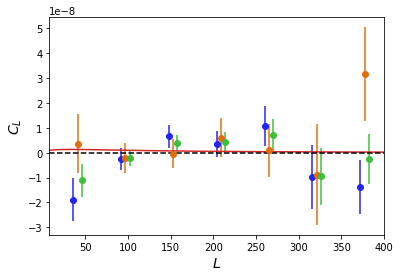

In [9]:
mb = bn.multipole_binning(7,lmin=8,lmax=400)
pl.plot_1dstyle(xmin=mb.lmin,xmax=mb.lmax)
mcb, vcb, scb, ocb = {}, {}, {}, {}
for i, q in enumerate(['TB','EB']):
    kk = savgol_filter( (np.loadtxt(xobj.fcli[q][0])).T[4], 21, 3)
    al = (np.loadtxt(qobj['ilens'].f[q].al)).T[1]
    vl = np.sqrt(al*kk)/np.sqrt(qobj['ilens'].l+1e-30)
    mcb[q], vcb[q], scb[q], ocb[q] = bn.binned_spec(mb,xobj.fcli[q],cn=3,opt=True,vl=vl)
    errorbar(mb.bc+i*5,ocb[q]-mcb[q],yerr=vcb[q],fmt='o')
mcb['c'], vcb['c'], scb['c'], ocb['c'] = tools_qrec.quad_comb(scb,vcb,ocb)
errorbar(mb.bc+i*10,ocb['c']-mcb['c'],yerr=vcb['c'],fmt='o')
plot(aobj.l,aobj.ckk*np.pi/180.*.35)
axhline(0,color='k',ls='--')

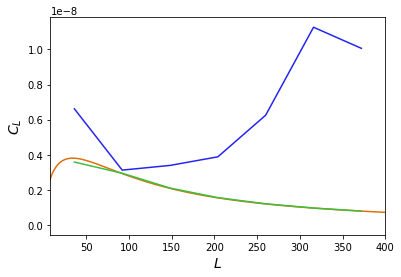

In [10]:
mkk = bn.binning(aobj.ckk*np.pi/180,mb)
pl.plot_1dstyle(xmin=mb.lmin,xmax=mb.lmax)
plot(mb.bc,vcb['c'])
plot(aobj.l,aobj.ckk*np.pi/180)
plot(mb.bc,mkk)

In [11]:
st_kap = {q: ana.amplitude(ocb[q]-mcb[q],scb[q],fcb=mkk,diag=True,disp=True) for q in ['TB','EB','c']}
st_kap = {q: ana.amplitude(ocb[q]-mcb[q],scb[q],fcb=mkk,diag=False,disp=True) for q in ['TB','EB','c']}

obs A -0.419 mean(A) 0.038 sigma(A) 1.142 S/N 0.876 A>oA 0.56
obs A 0.219 mean(A) 0.133 sigma(A) 1.604 S/N 0.624 A>oA 0.98
obs A -0.183 mean(A) 0.073 sigma(A) 0.755 S/N 1.325 A>oA 0.7
obs A -0.075 mean(A) 0.038 sigma(A) 1.142 S/N 0.876 A>oA 0.8400000000000001
obs A -0.057 mean(A) 0.133 sigma(A) 1.604 S/N 0.624 A>oA 0.8600000000000001
obs A -0.144 mean(A) 0.073 sigma(A) 0.755 S/N 1.325 A>oA 0.74


#### lens x cib

In [22]:
mb = bn.multipole_binning(9,lmin=8,lmax=400)

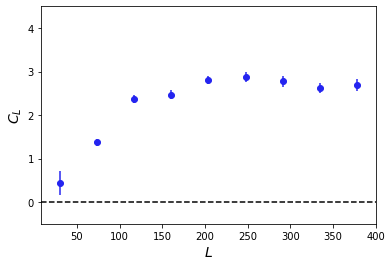

In [23]:
pl.plot_1dstyle(xmin=mb.lmin,xmax=mb.lmax,ymin=-.5,ymax=4.5)
mIk, vIk, sIk, oIk = bn.binned_spec(mb,xobj.fcli['TB'],cn=7)
s = 10*2.726e6*mb.bc*2
errorbar(mb.bc,oIk*s,yerr=vIk*s,fmt='o')
axhline(0,color='k',ls='--')

#### ilens x cib

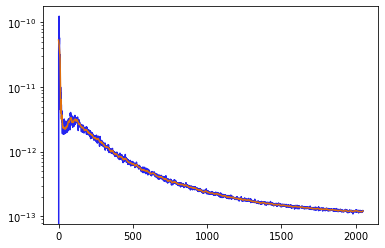

In [24]:
yscale('log')
II = savgol_filter( (np.loadtxt(xobj.fcli['TB'][0])).T[6], 21, 2)
plot(np.loadtxt(xobj.fcli['TB'][0]).T[6])
plot(II)

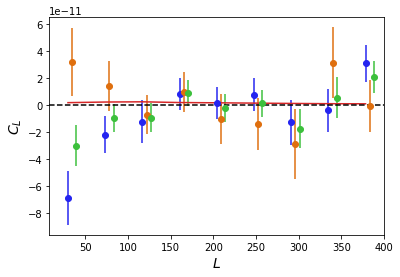

In [25]:
pl.plot_1dstyle(xmin=mb.lmin,xmax=mb.lmax)
mcb, vcb, scb, ocb = {}, {}, {}, {}
for i, q in enumerate(['TB','EB']):
    II = savgol_filter( (np.loadtxt(xobj.fcli[q][0])).T[6], 21, 2)
    al = (np.loadtxt(qobj['ilens'].f[q].al)).T[1]
    vl = np.sqrt(al*II)/np.sqrt(qobj['ilens'].l+1e-30)
    mcb[q], vcb[q], scb[q], ocb[q] = bn.binned_spec(mb,xobj.fcli[q],cn=5,opt=True,vl=vl)
    errorbar(mb.bc+i*5,ocb[q]-mcb[q],yerr=vcb[q],fmt='o')
mcb['c'], vcb['c'], scb['c'], ocb['c'] = tools_qrec.quad_comb(scb,vcb,ocb)
errorbar(mb.bc+i*10,ocb['c']-mcb['c'],yerr=vcb['c'],fmt='o')
plot(mb.bc,oIk*np.pi/180.*.35)
axhline(0,color='k',ls='--')

In [26]:
st_cib = {q: ana.amplitude(ocb[q]-mcb[q],scb[q],fcb=oIk*np.pi/180,diag=True,disp=True) for q in ['TB','EB','c']}
st_cib = {q: ana.amplitude(ocb[q]-mcb[q],scb[q],fcb=oIk*np.pi/180,diag=False,disp=True) for q in ['TB','EB','c']}

obs A -1.243 mean(A) -0.137 sigma(A) 1.04 S/N 0.962 A>oA 0.32000000000000006
obs A 0.268 mean(A) -0.037 sigma(A) 1.573 S/N 0.636 A>oA 0.98
obs A -0.769 mean(A) -0.081 sigma(A) 0.922 S/N 1.084 A>oA 0.45999999999999996
obs A -1.334 mean(A) -0.137 sigma(A) 1.04 S/N 0.962 A>oA 0.28
obs A 0.43 mean(A) -0.037 sigma(A) 1.573 S/N 0.636 A>oA 0.88
obs A -0.614 mean(A) -0.081 sigma(A) 0.922 S/N 1.084 A>oA 0.56


In [27]:
A = st_cib['TB'].A-st_cib['EB'].A
oA = st_cib['TB'].oA-st_cib['EB'].oA

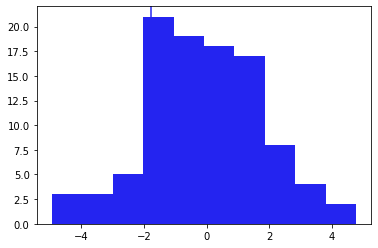

In [28]:
hist(A)
axvline(oA)

In [29]:
mean, sigma = {}, {}
for q in ['TB','EB','c']:
    sigma[q] = np.sqrt(1./(1./st_cib[q].sA**2+1./st_kap[q].sA**2))
    mean[q] = (st_cib[q].oA/st_cib[q].sA**2+st_kap[q].oA/st_kap[q].sA**2)*sigma[q]**2
    print(mean[q],sigma[q])

-0.7630674131890384 0.7687263485217161
0.1911565546958739 1.1229943091247647
-0.3326783946805721 0.5841423534986746


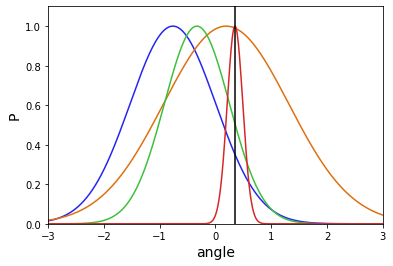

In [30]:
pl.plot_1dstyle(xmin=-3,xmax=3,ymin=0.0,ymax=1.1,xlab='angle',ylab='P')
x  = np.arange(-3.,3.,.01)
for q in ['TB','EB','c']:
    plot(x,np.exp(-.5*(x-mean[q])**2/sigma[q]**2))
    #plot(x,np.exp(-.5*(x-st_cib[q].oA)**2/(st_cib[q].sA)**2))
#hist(st_cib['c'].A,bins=12,weights=np.ones_like(st_cib['c'].A)/float(len(st_cib['c'].A)))
#axvline(mean+sigma)
#axvline(mean-sigma)
plot(x,np.exp(-.5*(x-.35)**2/.14**2))
axvline(.35,color='k')

In [31]:
oAc = (mean['c']/sigma['c']**2+.35/.14**2)/(1./sigma['c']**2+1./.14**2)
vAc = 1./(1./sigma['c']**2+1./.14**2)**0.5
print(oAc,vAc,oAc/vAc)

0.3129166574847023 0.13614448487408695 2.2984159642904585
